In [16]:
import numpy as np
import numpy.random as npr
import pandas as pd
import graph_tool.all as gt
import matplotlib.pyplot as plt

In [17]:
kpair = np.load('kpair.npy')
kname = np.load('kname.npy')
kpairname = np.load('kpairname.npy')

In [18]:
g = gt.Graph(directed=False)
g.vertex_properties['id'] = g.add_edge_list(kpair, hashed=True)
g

<Graph object, undirected, with 185 vertices and 9128 edges at 0x7f47fc6873c8>

In [19]:
names = np.array(pd.merge(pd.DataFrame(g.vertex_properties['id'].a),
                          pd.DataFrame(kname), left_on=0, right_on=0)[1])
g.vertex_properties['name'] = g.new_vertex_property("string", names)

In [20]:
%time snest = gt.minimize_nested_blockmodel_dl(g)

CPU times: user 1min, sys: 1.17 s, total: 1min 1s
Wall time: 20.9 s


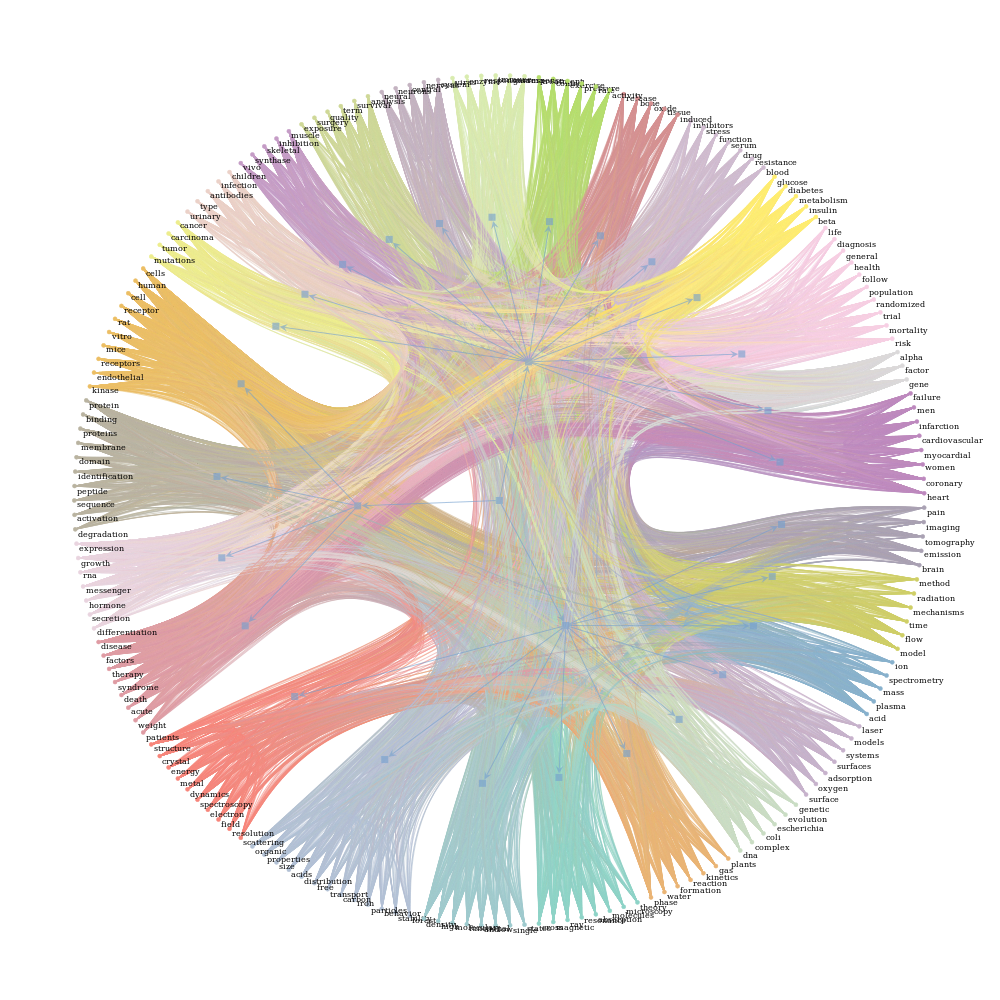

(<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f47fc6873c8, at 0x7f482d361080>,
 <Graph object, directed, with 216 vertices and 215 edges at 0x7f482d361da0>,
 <PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f482d361da0, at 0x7f47fc95fbe0>)

In [21]:
snest.draw(vertex_font_size=8, vertex_size=4, vertex_text_position=1,
        vertex_text=g.vertex_properties['name'], output_size=(1000, 1000), output='testkclustern.png')

In [22]:
%time sbase = gt.minimize_blockmodel_dl(g)

CPU times: user 10.3 s, sys: 208 ms, total: 10.5 s
Wall time: 3.28 s


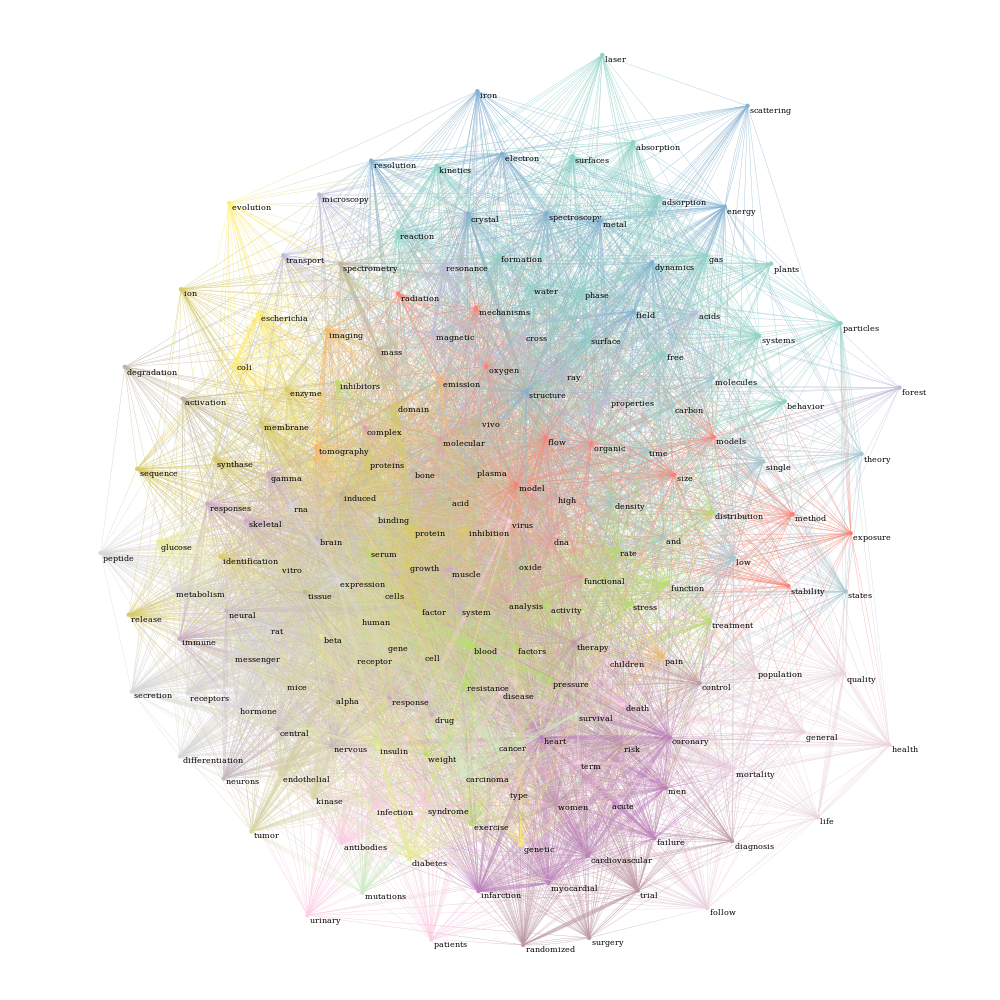

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f47fc6873c8, at 0x7f47fc95f0f0>

In [23]:
sbase.draw(vertex_font_size=8, vertex_size=4, vertex_text_position=1,
        vertex_text=g.vertex_properties['name'], output_size=(1000, 1000), output='testkcluster.png')